DISCORDS

Preparation

In [1]:
import os
import numpy as np
import pandas as pd

def load_npy(time_series):
    with open(time_series, 'rb') as f:
        return np.load(f)

def preparation_ts():
    dir_path = 'time_series/'
    len_threshold = 1280  # threshold length for time series
    
    X, y, ids = [], [], []

    for file in os.listdir(dir_path):
        if os.path.splitext(file)[1] != '.npy':
            continue

        split = file.split("_")  # split the filename
        ids.append(split[0])  # track_id
        y.append(split[1][:-4])  # genre
        ts = load_npy(os.path.join(dir_path, file))
    
        if len(ts) > len_threshold:
            ts = ts[:len_threshold]
        else:
            pad = [ts[-1]] * (len_threshold - len(ts))  # fill with last observation
            ts = np.append(ts, pad)

        X.append(ts)  # append the time series data directly

    X, y, ids = np.array(X), np.array(y), np.array(ids)
    
    # Create a DataFrame
    df = pd.DataFrame(X)
    df['genre'] = y
    df['track_id'] = ids
    
    # Save the DataFrame to a CSV file
    df.to_csv('time_series_data.csv', index=False)

    return df

df = preparation_ts()


In [13]:
import pandas as pd
df = pd.read_csv('time_series_data.csv')


,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,genre,track_id
0,4033.983233,4452.531825,4493.084636,4205.104114,4124.152380,4374.528603,4218.922430,4811.479415,5380.497768,5408.836533,...,4136.007023,4515.116157,4272.059542,3179.082991,3119.379434,3163.797698,3135.170030,3470.557808,happy,002qpSULhHAw6DGqFxbaO1
1,1246.782278,1275.037576,1389.825458,1425.923045,1453.146435,1439.394669,1446.677260,1452.278668,1562.862604,1716.595733,...,945.693979,2427.495847,4272.999098,4756.297360,3155.547176,2652.793629,2693.680737,2600.652552,emo,004h8smbIoAkUNDJvVKwkG
2,556.527371,570.688219,632.791952,724.284541,700.265785,637.978949,580.044365,541.837395,538.979271,561.738058,...,651.783128,600.108454,568.681377,537.072023,536.968066,549.719850,575.656227,565.242703,world-music,006ATYzgynEKIPgVaT5LQM
3,2318.553884,2415.404641,2587.678594,2679.752782,2476.585990,2354.537616,2351.667896,2319.100690,2417.571585,2431.619017,...,2369.967771,2435.225332,2516.305110,2457.247966,2398.038946,2382.307384,2390.305834,2520.164300,heavy-metal,00C93bsNIjHStKvr1lPJee
4,2197.095845,2299.780004,2340.115366,2230.133271,2162.143986,2060.925716,2085.023936,2122.772450,2095.381438,2073.004571,...,1884.790511,2036.814810,2283.750682,2403.766504,2551.391082,2413.472908,2248.364802,2249.086879,progressive-house,00CsDW3I9XueUvaXnAvGMm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2714.675059,2273.567285,1794.152523,1461.596435,1486.842231,1576.816447,1656.734425,1676.028261,1779.922921,1737.991497,...,2771.815674,2639.636103,2594.053748,2520.841825,2592.052944,2631.374097,2830.008571,2531.497095,synth-pop,7zmbtfKgZMTQ1GlqBno5T5
9996,618.054847,620.631310,612.652137,636.176379,635.752477,631.399916,605.110771,626.046116,624.747279,591.403780,...,548.647430,551.268466,539.168279,529.838171,567.515093,588.830356,559.373196,558.468585,piano,7zP20CANb26S52imHKKWEc
9997,2302.092948,2354.562900,2498.050464,2485.572104,2368.360732,2397.476901,2450.164601,2463.453644,2638.358828,2428.885493,...,1490.870560,2057.341857,2309.620417,2334.191132,2324.397193,2277.928664,2288.184316,2237.393099,world-music,7zvGj5jjRIBRqT82crTMVf
9998,277.987301,284.186192,294.089063,290.958406,289.316498,298.456330,300.274822,299.111098,301.967315,300.353719,...,288.714580,285.405406,281.218507,277.622963,295.527480,286.623827,276.994329,260.720517,sleep,7zwddyEol0Hg5K8HQd3srX


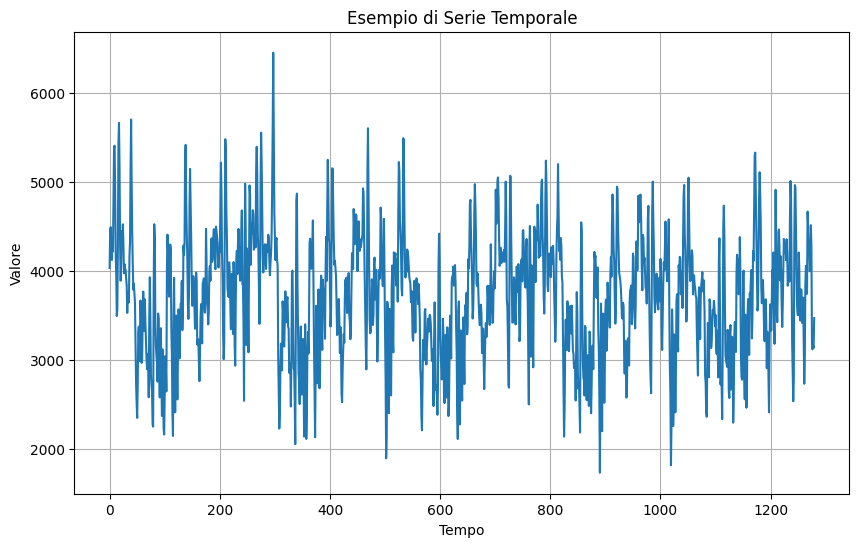

In [16]:
# Carica il DataFrame
df = pd.read_csv('time_series_data.csv')

ts = df.iloc[0, :-2].values  # prende tutte le colonne tranne le ultime due (genre e track_id)

# Plot della serie temporale
plt.figure(figsize=(10, 6))  # Imposta la dimensione della figura (opzionale)
plt.plot(ts)
plt.title('Esempio di Serie Temporale')
plt.xlabel('Tempo')
plt.ylabel('Valore')
plt.grid(True)
plt.show()


matrix

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matrixprofile import *

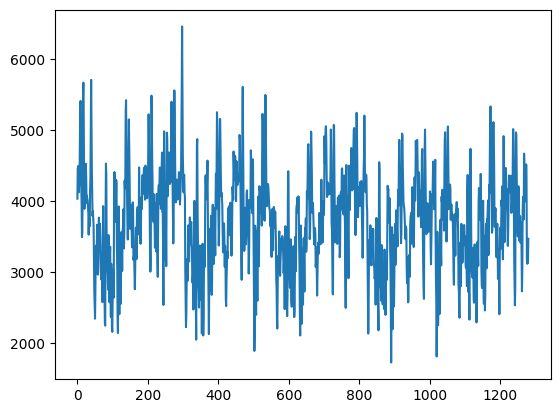

In [17]:
plt.plot(ts)
plt.show()

Pulisco la mia serie temporale dai NaN e poi applico la matrix profile

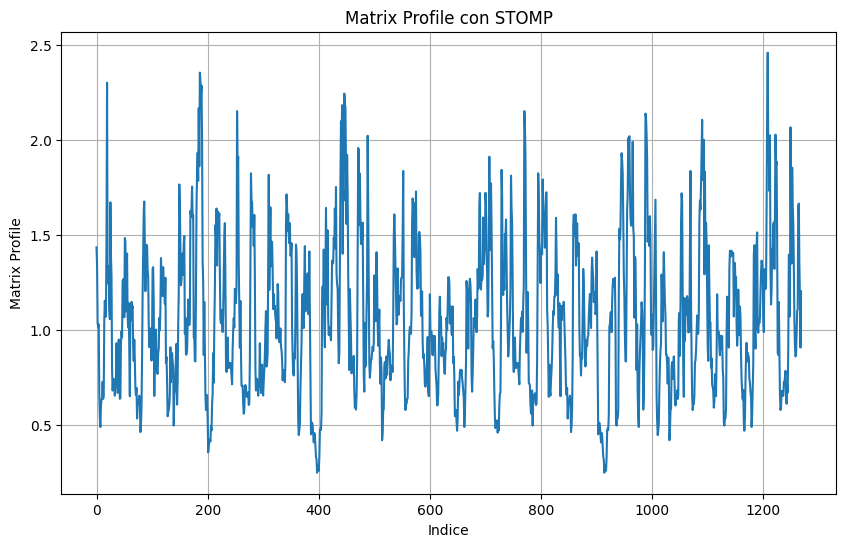

In [26]:
# Gestione di NaN e Inf in un array numpy
ts = ts.astype(float)  # Assicura che ts sia di tipo float
ts[np.isnan(ts) | np.isinf(ts)] = np.nanmean(ts[np.isfinite(ts)])  # Sostituisci NaN e Inf con la media dei valori validi

# Calcolare il matrix profile
w = 12
mp, mpi = matrixProfile.stomp(ts, w)

# Plot del matrix profile
plt.figure(figsize=(10, 6))
plt.plot(mp)
plt.title('Matrix Profile con STOMP')
plt.xlabel('Indice')
plt.ylabel('Matrix Profile')
plt.grid(True)
plt.show()


In [27]:
mp[:10]

array([1.43628143, 1.33987722, 1.03693926, 1.01656835, 1.03134384,
       0.66521126, 0.53732557, 0.49089858, 0.60410074, 0.63629686])

In [28]:
mpi[:10]

array([1034., 1035.,  778.,  779.,  973.,  974.,  975.,  976., 1042.,
       1043.])

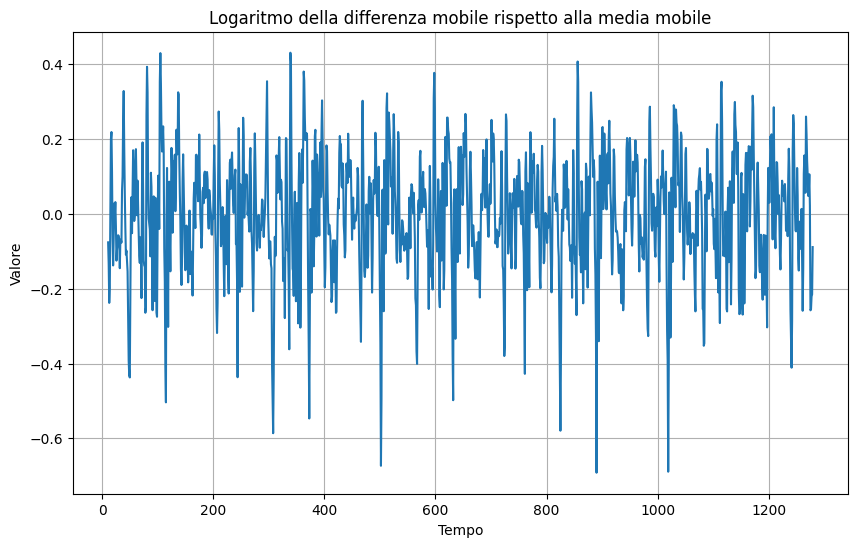

In [31]:

window = 12
ts_log = np.log(ts)  # Calcola il logaritmo naturale dei dati
ts_log_mov_mean = pd.Series(ts_log).rolling(window, center=False).mean()  # Calcola la media mobile
ts_log_mov_diff = pd.Series(ts_log - ts_log_mov_mean.values, index=np.arange(len(ts)))  # Calcola la differenza mobile rispetto alla media mobile

# Plot della serie ts_log_mov_diff
plt.figure(figsize=(10, 6))
plt.plot(ts_log_mov_diff)
plt.title('Logaritmo della differenza mobile rispetto alla media mobile')
plt.xlabel('Tempo')
plt.ylabel('Valore')
plt.grid(True)
plt.show()



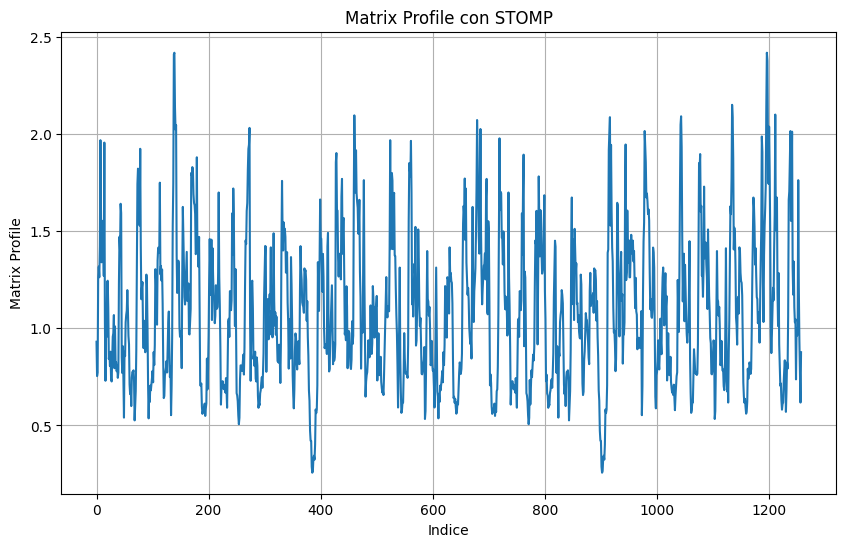

In [32]:
import matplotlib.pyplot as plt
from matrixprofile import matrixProfile

w = 12
mp, mpi = matrixProfile.stomp(ts_log_mov_diff.values[11:], w)  # Calcola il matrix profile

# Plot del matrix profile
plt.figure(figsize=(10, 6))
plt.plot(mp)
plt.title('Matrix Profile con STOMP')
plt.xlabel('Indice')
plt.ylabel('Matrix Profile')
plt.grid(True)
plt.show()


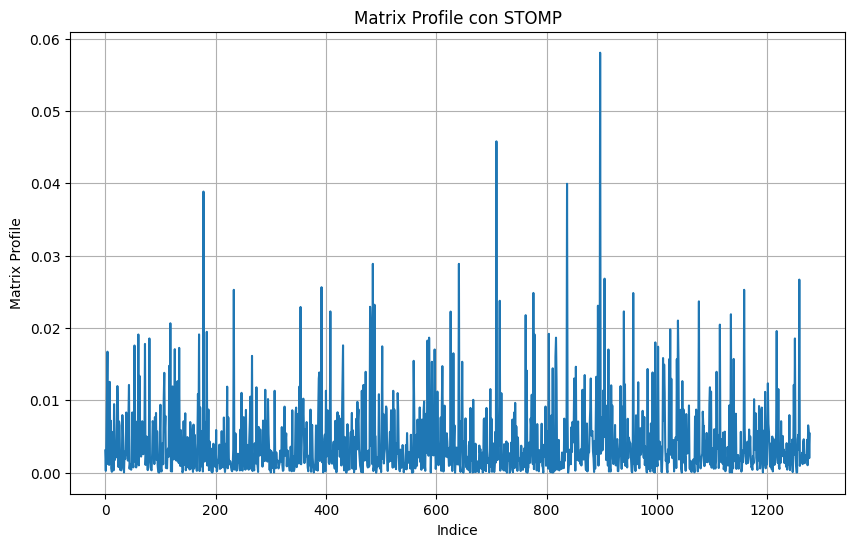

In [34]:
w = 3
mp, mpi = matrixProfile.stomp(ts, w)  # Calcola il matrix profile

# Plot del matrix profile
plt.figure(figsize=(10, 6))
plt.plot(mp)
plt.title('Matrix Profile con STOMP')
plt.xlabel('Indice')
plt.ylabel('Matrix Profile')
plt.grid(True)
plt.show()

# Motif Discovery

In [36]:
#mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

mo, mod  = motifs.motifs(ts, (mp, mpi), max_motifs=5)

In [37]:
mo

[[491, 765], [556, 733], [634, 728], [437, 649], [839, 1045]]

In [38]:
mod

[1.8543415952485764e-06,
 2.00518919456057e-06,
 3.151093563040861e-06,
 8.826079916998474e-06,
 1.460842084451372e-05]

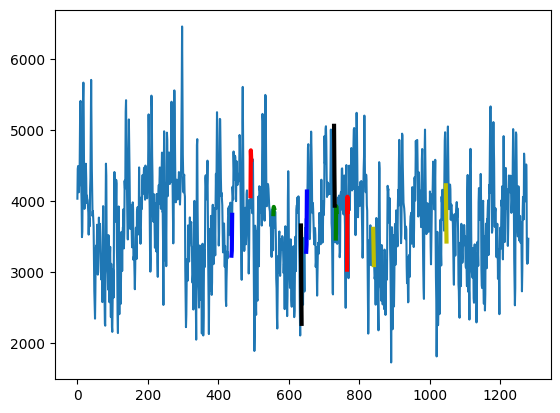

In [41]:
plt.plot(ts)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

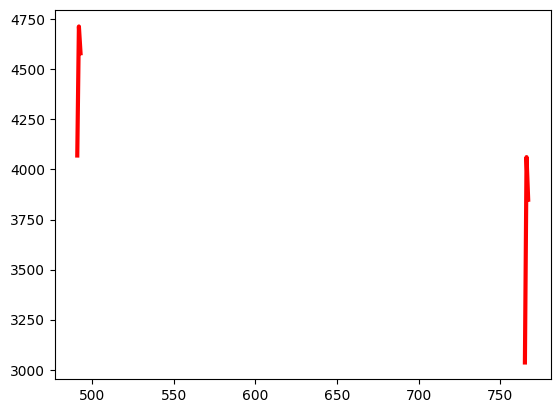

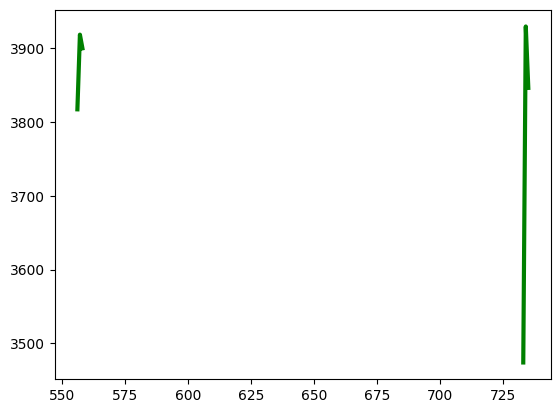

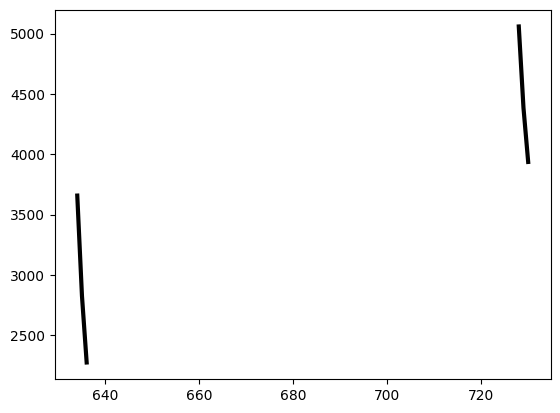

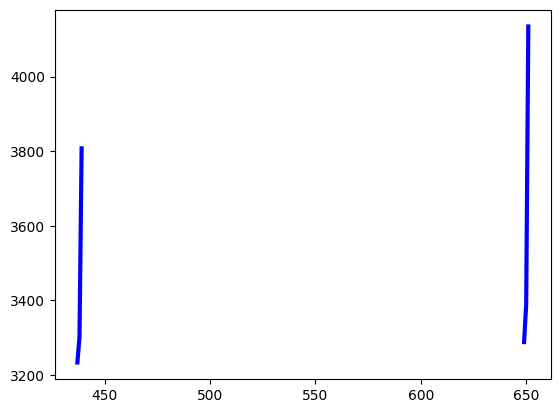

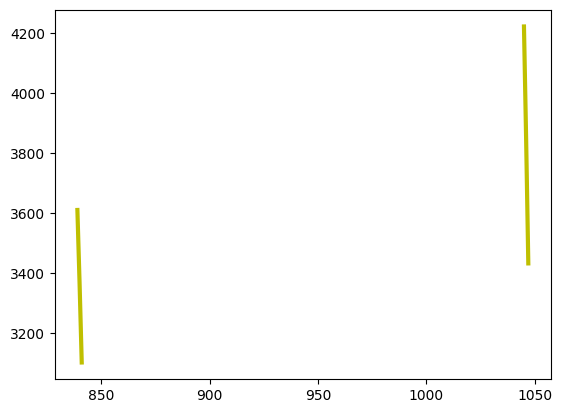

In [42]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

# DISCORDS

In [43]:
from matrixprofile.discords import discords

In [71]:
anoms = discords(mp, ex_zone=3, k=5)

In [72]:
anoms

array([897, 709, 837, 178, 485])

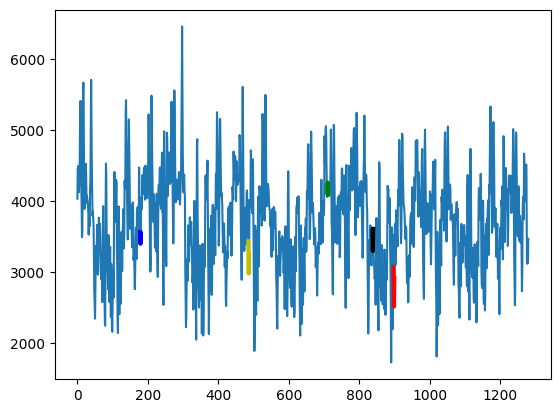

In [73]:
plt.plot(ts)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

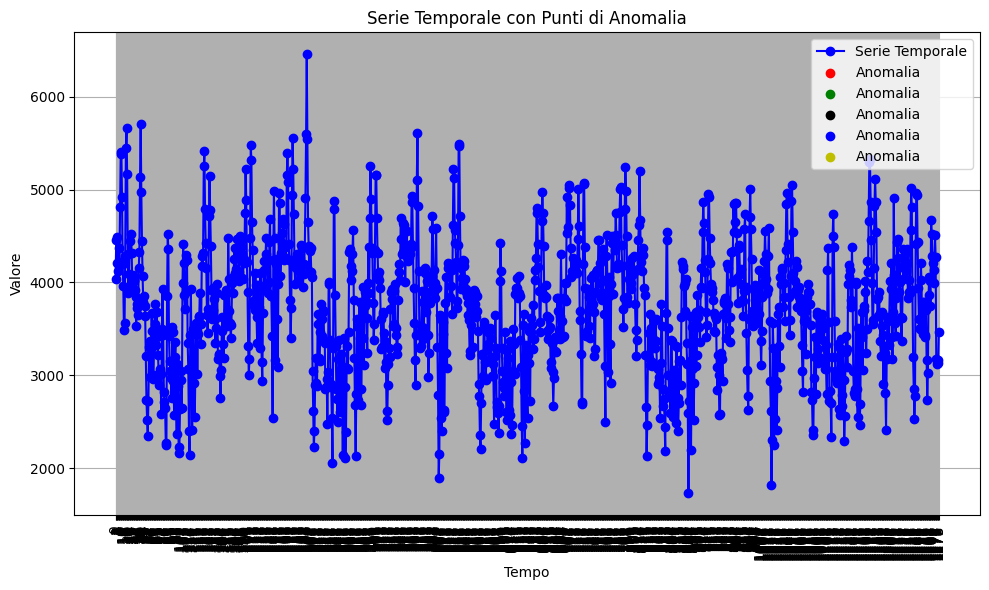

In [89]:
import matplotlib.pyplot as plt

# Plot della serie temporale originale
plt.figure(figsize=(10, 6))
plt.plot(range(len(ts)), ts, marker='o', color='b', label='Serie Temporale')
plt.xticks(range(len(ts)), rotation=90)

plt.xlabel('Tempo')
plt.ylabel('Valore')
plt.title('Serie Temporale con Punti di Anomalia')
plt.grid(True)

# Sovrapposizione dei punti di anomalia sul grafico
colors = ['r', 'g', 'k', 'b', 'y'][:len(anoms)]
for a, c in zip(anoms, colors):
    plt.scatter(a, ts[a], color=c, label='Anomalia')

plt.legend()
plt.tight_layout()
plt.show()


In [94]:
mp, mpi = matrixProfile.naiveMP(ts, m=12)

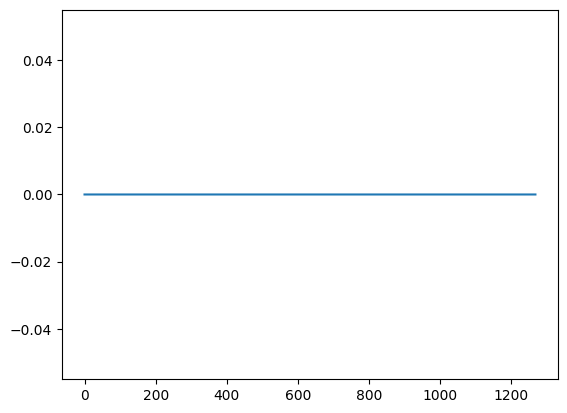

In [95]:
plt.plot(mp)
plt.show()

In [96]:
mp

array([0., 0., 0., ..., 0., 0., 0.])

In [97]:
mpi

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.266e+03, 1.267e+03,
       1.268e+03])

In [98]:
import stumpy

In [99]:
matrix_profile = stumpy.stump(ts.astype(float), m=12)

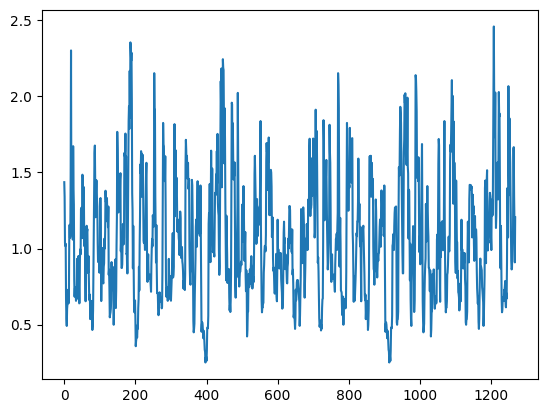

In [100]:
mp = matrix_profile[:,0]
mpi = matrix_profile[:,1]

plt.plot(mp)
plt.show()

In [101]:
matrix_profile

array([[1.4362814345658341, 1034, -1, 1034],
       [1.3398772168804112, 1035, -1, 1035],
       [1.0369392596488087, 778, -1, 778],
       ...,
       [1.163792585140414, 1137, 1137, -1],
       [0.9089564386598896, 1138, 1138, -1],
       [1.2052328857815826, 299, 299, -1]], dtype=object)

In [102]:
from sktime.transformations.series.matrix_profile import MatrixProfileTransformer

In [103]:
transformer = MatrixProfileTransformer(12)  
mp = transformer.fit_transform(ts)  
mp[:10]

array([1.43628143, 1.33987722, 1.03693926, 1.01656835, 1.03134384,
       0.66521126, 0.53732557, 0.49089858, 0.60410074, 0.63629686])